In [177]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from os import listdir

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

import my_func
import importlib
importlib.reload(my_func)

&lt;module &#39;my_func&#39; from &#39;c:\\Users\\Evgen\\skillfactory\\Projects\\Project_4\\my_func.py&#39;&gt;

In [178]:
RANDOM_SEED = 42

In [179]:
data_train = pd.read_csv('kaggle/train.csv')
data_subm = pd.read_csv('kaggle/sample_submission.csv')
data_test = pd.read_csv('kaggle/test.csv')
data_train['train'] = 1 # помечаем где у нас трейн
data_test['train'] = 0 # помечаем где у нас тест
data = data_train.append(data_test, sort=False).reset_index(drop=True)

In [180]:
data[data.train==0].app_date

73799     22MAR2014
73800     24JAN2014
73801     23MAR2014
73802     03FEB2014
73803     04FEB2014
            ...    
110143    31MAR2014
110144    25APR2014
110145    30MAR2014
110146    07JAN2014
110147    17MAR2014
Name: app_date, Length: 36349, dtype: object

In [181]:
import main
from main import df_scrolling_object
import importlib
importlib.reload(main)
data_obj = df_scrolling_object(data[data.train==1])
X, Y = data_obj.return_XY()

data_obj.cat_cols

[&#39;education&#39;,
 &#39;home_address&#39;,
 &#39;work_address&#39;,
 &#39;first_time&#39;,
 &#39;sna&#39;,
 &#39;region_rating&#39;]

0        61
1        58
2        21
3        50
4        44
         ..
73794    41
73795    37
73796    29
73797    26
73798    31
Name: age_first, Length: 73799, dtype: int64

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RANDOM_SEED)

In [183]:
X_train.shape

(59039, 44)

roc_auc=0.744719  C=1  penalty=l2 solver=newton-cg


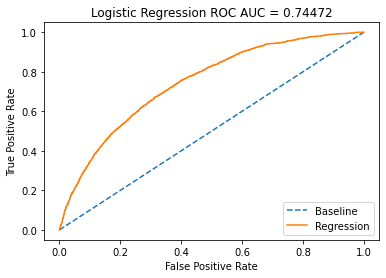

In [184]:
C = 1
penalty = 'l2'
solver = 'newton-cg'

model = LogisticRegression(C=C, penalty=penalty, solver=solver)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
probs = probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title(f'Logistic Regression ROC AUC = {roc_auc:.5f}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

print(f'roc_auc={round(roc_auc, 6)}  C={C}  penalty={penalty} solver={solver}')

roc_auc=0.677348  C=1  penalty=l2 solver=newton-cg   
roc_auc = 0.67734 C = 1 penalty = l2  
roc_auc = 0.677361  C = 1  penalty = l2

In [185]:
print(confusion_matrix(y_test, y_pred))

print(f'f1 test {f1_score(y_test, y_pred)}')
print(f'f1 train {f1_score(y_train, y_pred_train)}')

[[12874    59]
 [ 1788    39]]
f1 test 0.040519480519480525
f1 train 0.04760705289672544


In [186]:
# data = data_obj.data
# imp_num = Series(f_classif(data[data_obj.num_cols], data['default'])[0], index = data_obj.num_cols)
# imp_num.sort_values(inplace = True)
# imp_num.plot(kind = 'barh')

In [187]:
# data[data.train==0].education.value_counts(dropna=False)

In [188]:
import main
from main import df_scrolling_object
import importlib
importlib.reload(main)
data_obj_test = df_scrolling_object(data[data.train==0])
X_test = data_obj_test.return_X()

y_pred_subm = model.predict_proba(X_test)[:,1]

submit = pd.DataFrame(X_test.client_id)
submit['default'] = y_pred_subm
submit.to_csv('submission.csv', index=False)

In [189]:
data[data.train==0].info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 36349 entries, 73799 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        363

In [190]:
# # Добавим типы регуляризации
# penalty = ['l1', 'l2']

# # Зададим ограничения для параметра регуляризации
# C = np.logspace(0, 4, 10)

# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# # Создадим гиперпараметры
# hyperparameters = dict(C=C, penalty=penalty)

# model = LogisticRegression(solver='newton-cg')
# model.fit(X_train, y_train)

# # Создаем сетку поиска с использованием 5-кратной перекрестной проверки
# clf = GridSearchCV(model, hyperparameters, cv=10, verbose=0)

# best_model = clf.fit(X_train, y_train)

# # View best hyperparameters
# print('Лучшее Penalty:', best_model.best_estimator_.get_params())
# print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

In [191]:
# data = data_obj.data
# n1 = data[data.default==1].shape[0]
# data_0 = data[data.default==0]
# data_1 = data[data.default==1]
# data_balanced = data_0[:n1].append(data_1)

# X = data_balanced.drop('default', axis=1)
# Y = data_balanced['default']

# X, Y = data_obj.return_bal_XY(2)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# C = 7.742636826811269
# penalty = 'l2'
# solver = 'liblinear'

# model = LogisticRegression(C=C, penalty=penalty, solver=solver)
# model.fit(X_train, y_train)

# probs = model.predict_proba(X_test)
# probs = probs[:,1]

# fpr, tpr, threshold = roc_curve(y_test, probs)
# roc_auc = roc_auc_score(y_test, probs)

# plt.figure()
# plt.plot([0, 1], label='Baseline', linestyle='--')
# plt.plot(fpr, tpr, label = 'Regression')
# plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc = 'lower right')

# print(f'roc_auc = {round(roc_auc, 6)}  C = {C}  penalty = {penalty}')

In [192]:
# for data_col in data_obj.num_cols:
#     my_func.get_boxplot(data_obj.data, 'default', data_col)

In [193]:
# data = data_obj.data
# data.groupby(by='default')[data_obj.num_cols].mean()#agg(lambda x: x.value_counts().index[0])



In [194]:
# data[data.default==1].decline_app_cnt.sort_values(ascending=False).head(50)
# def outlier_treatment(datacolumn):
#     sorted(datacolumn)
#     Q1,Q3 = np.percentile(datacolumn , [25,75])
#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)
#     return lower_range, upper_range

# print(outlier_treatment(data[data.default==1].decline_app_cnt))

# data.decline_app_cnt.sort_values(ascending=False).head(50)


# # data[(data.default==1)][data_obj.cat_cols].hist()
# data[data.default==1].shape
# data[(data.default==1)]['education'].hist()

In [195]:
# C = 1
# penalty = 'l2'
# solver = 'newton-cg'

# clf = LogisticRegressionCV(Cs=1, cv=5, solver=solver).fit(X_train, y_train)
# clf.predict(X_test)
# probs = clf.predict_proba(X_test)
# probs = probs[:,1]

# fpr, tpr, threshold = roc_curve(y_test, probs)
# roc_auc = roc_auc_score(y_test, probs)

# plt.figure()
# plt.plot([0, 1], label='Baseline', linestyle='--')
# plt.plot(fpr, tpr, label = 'Regression')
# plt.title(f'Logistic Regression ROC AUC = {roc_auc:.5f}')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc = 'lower right')

# print(f'roc_auc={round(roc_auc, 6)}  C={C}  penalty={penalty} solver={solver}')